### 0. 라이브러리 호출

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### 1. 데이터 불러오기

In [2]:
# 회사별 직무, 규모
job_companies = pd.read_csv('train_job/job_companies.csv')
# 직무별 태그
job_tags = pd.read_csv('train_job/job_tags.csv')
# 태그별 키워드
tags = pd.read_csv('train_job/tags.csv')
# 유저별 태그
user_tags = pd.read_csv('train_job/user_tags.csv')

# 유저별 직무, 지원 여부
train = pd.read_csv('train_job/train.csv')

In [3]:
test_job = pd.read_csv('test_folder/test_job.csv')
sample_output_job = pd.read_csv('test_folder/sample_output_job.csv')

### 2. EDA

2-1. 회사별 직무, 규모

In [4]:
job_companies.head() # 회사ID, 직무ID, 회사규모

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [5]:
job_companies.info() # 회사 규모 기재되지 않은 90곳 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   companyID    733 non-null    object
 1   jobID        733 non-null    object
 2   companySize  643 non-null    object
dtypes: object(3)
memory usage: 17.3+ KB


회사 규모 결측치 90개, 결측치 제거 혹은 대치 필요

In [6]:
job_companies['companyID'].value_counts()

companyID
b5dc4e5d9b495d0196f61d45b26ef33e    18
3b8a614226a953a8cd9526fca6fe9ba5    15
4f6ffe13a5d75b2d6a3923922b3922e5    14
c058f544c737782deacefa532d9add4c    12
eddea82ad2755b24c4e168c5fc2ebd40    12
                                    ..
facf9f743b083008a894eee7baa16469     1
ed4227734ed75d343320b6a5fd16ce57     1
bb7946e7d85c81a9e69fee1cea4a087c     1
7a6a74cbe87bc60030a4bd041dd47b78     1
b5b41fac0361d157d9673ecb926af5ae     1
Name: count, Length: 276, dtype: int64

In [7]:
job_companies['companySize'].value_counts()

companySize
11-50       260
51-100      142
1-10        100
101-200      60
201-500      56
1000 이상      13
501-1000     12
Name: count, dtype: int64

한 회사당 다양한 직무들이 존재하며, 규모는 동일하게 기재되어 있음

In [8]:
def change_size(x):

    if x == "1000 이상":

        return 1000
    
    else:

        y = (int(x.split("-")[0]) + int(x.split("-")[1]))//2 # string 평균 값으로 대치

        return y

job_companies['companySize'] = job_companies['companySize'].apply(lambda x:change_size(x) if type(x) == str else x)

회사의 직무 수와 규모는 상관 관계가 있을 거라 생각해 확인했으나 없다고 보여짐

In [9]:
company_jobs = job_companies['companyID'].value_counts().reset_index()

company_size = job_companies[['companyID','companySize']].drop_duplicates('companyID')

company_jobs_size = pd.merge(company_jobs, company_size, how='inner', left_on='companyID', right_on='companyID')

company_jobs_size.head()

,companyID,count,companySize
0,b5dc4e5d9b495d0196f61d45b26ef33e,18,75.0
1,3b8a614226a953a8cd9526fca6fe9ba5,15,350.0
2,4f6ffe13a5d75b2d6a3923922b3922e5,14,30.0
3,c058f544c737782deacefa532d9add4c,12,150.0
4,eddea82ad2755b24c4e168c5fc2ebd40,12,30.0


In [10]:
company_jobs_size[['count','companySize']].corr()

,count,companySize
count,1.000000,0.117283
companySize,0.117283,1.000000


회사의 규모 분포도

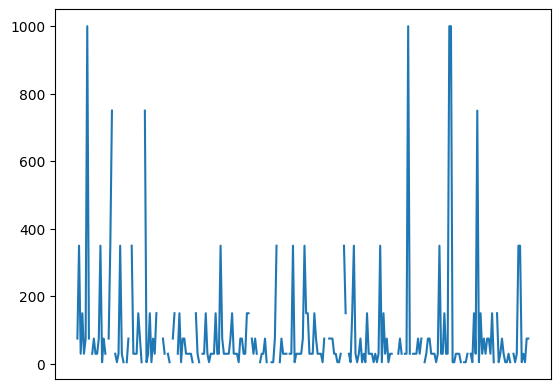

In [11]:
fig, ax = plt.subplots()

ax.plot(company_jobs_size['companyID'], company_jobs_size['companySize'])

# x축 숨기기
ax.xaxis.set_visible(False)

# 그래프 출력
plt.show()

2-2. 직무별 태그

In [12]:
job_tags.head() # 직무ID, 직무태그ID

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
3,e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d
4,e820a45f1dfc7b95282d10b6087e11c0,6c8dba7d0df1c4a79dd07646be9a26c8


In [13]:
job_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   jobID   3477 non-null   object
 1   tagID   3477 non-null   object
dtypes: object(2)
memory usage: 54.5+ KB


In [14]:
job_tags.groupby('jobID')['tagID'].value_counts() # 직무당 다양한 태그 존재

jobID                             tagID                           
00ac8ed3b4327bdd4ebbebcb2ba10a00  0c048b3a434e49e655c1247efb389cec    1
                                  69d658d0b2859e32cd4dc3b970c8496c    1
                                  884d79963bd8bc0ae9b13a1aa71add73    1
                                  9a3d458322d70046f63dfd8b0153ece4    1
                                  aace49c7d80767cffec0e513ae886df0    1
                                                                     ..
ffeabd223de0d4eacb9a3e6e53e5448d  602d1305678a8d5fdb372271e980da6a    1
                                  a1d50185e7426cbb0acad1e6ca74b9aa    1
                                  a9078e8653368c9c291ae2f8b74012e7    1
ffeed84c7cb1ae7bf4ec4bd78275bb98  3948ead63a9f2944218de038d8934305    1
                                  bd4c9ab730f5513206b999ec0d90d1fb    1
Name: count, Length: 3477, dtype: int64

직무 별로 다양한 태그 존재

2-3. 태그의 키워드(의미)

In [15]:
tags.head() # 태그가 의미하는 키워드

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python


In [16]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tagID    887 non-null    object
 1   keyword  887 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


2-4. 지원자별 태그

In [17]:
user_tags.head() # 유저ID, 유저가 가진 태그

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a


In [18]:
user_tags['userID'].value_counts()

userID
f69054686ba46877b6397ccdb8f51762    572
eeedf6d4d717eba333e1b53f1b5375c8    447
0cc8f7bf8a8d56980414a6e4bc69cdc6    358
87c0a904d6f959e5ecbd0bdaa29d8be9    336
5585082ed1ea25eaf73052029f2161ce    325
                                   ... 
37b96469b46dfd9919cd984b788ceb17      5
4611b8ff403bea67637c3f1911940668      5
68a61f9415f07a4040f7afe82a058608      5
15d84e9a5eceb67bcb8fb0e8c839a903      5
4802630177809fcf861411501a443abb      4
Name: count, Length: 196, dtype: int64

지원자당 태그 수가 너무 많은 것 같아 확인, 중복 존재

In [19]:
print('기존 데이터:',len(user_tags))
print('중복 제거 후:',len(user_tags.drop_duplicates(subset=['userID','tagID']))) # 유저당 직무 태그 중복 존재하므로 제거 필요

기존 데이터: 17194
중복 제거 후: 2582


중복 제거 

In [20]:
user_tags.drop_duplicates(subset=['userID','tagID'], inplace=True) # 유저당 직무 태그 중복 존재하므로 중복 제거

user_tags['userID'].value_counts() # 최소 1개부터 최대 50개의 기술 스택 가진 유저도 있음

userID
ac9e4248f16d319a00b803477db2433a    50
f69054686ba46877b6397ccdb8f51762    34
788ecdd13f033f8131eecd90ee59993e    34
eeedf6d4d717eba333e1b53f1b5375c8    33
b052e2e0c0ad1b2d5036bd56e27d061c    33
                                    ..
68a61f9415f07a4040f7afe82a058608     1
847a7251b574c85da9c2248125c2df93     1
4802630177809fcf861411501a443abb     1
b292c42b08d209a8baa530adc393671d     1
37b96469b46dfd9919cd984b788ceb17     1
Name: count, Length: 196, dtype: int64

2-5. 유저별 직무 지원 기록 데이터

In [21]:
train.head() # 유저가 해당 직무에 지원했는지 안했는지

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userID   6000 non-null   object
 1   jobID    6000 non-null   object
 2   applied  6000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [23]:
train['applied'].value_counts()

applied
0    5143
1     857
Name: count, dtype: int64